In [88]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
%run Line.ipynb
%run myutil.ipynb

p1_mean : [0.31217341411647886, 0.6826627426860682]
 p1_std : [0.21783584413952944, 0.21901181692016086]
p2_mean : [0.20785962547987175, 0.4909294239343019, 0.4909294239343019, 0.7877048865217154]
 p1_std : [0.16278946419439896, 0.1882154510802179, 0.1882154510802179, 0.1618377773011451]
p3_mean : [0.15441930255000147, 0.38685432990871593, 0.38685432990871593, 0.6115297344935292, 0.6115297344935292, 0.8389384269153699]
 p1_std : [0.12964779334126822, 0.16103190643389753, 0.16103190643389753, 0.16067148907966647, 0.16067148907966647, 0.13458697523079677]


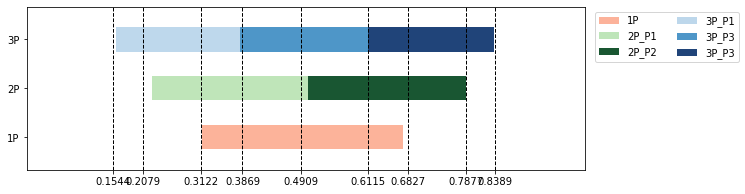

In [154]:

def p1(num):
    x_list = [[[],[]]]
    for i in range(num):
        l = Line(1, '1p', 5)
        x_list[0][0].append(min(l.x))
        x_list[0][1].append(max(l.x))
        
    #xl = np.mean(x_list[0])
    #xr = np.mean(x_list[1])
    
    ret = get_statistics(x_list)
    
    #print(f"xl : {xl}, xr : {xr}")
        
    return ret['mean'], ret['std']

def p2(num):
    x_list = [[[],[]],[[],[]]]
    for i in range(num):
        l = Line(2, '1p', 5)
        x_list[0][0].append(min(l.p_list[0].x)) #p1 xl
        x_list[0][1].append(max(l.p_list[0].x)) #p1 xr
        x_list[1][0].append(min(l.p_list[1].x)) #p2 xl
        x_list[1][1].append(max(l.p_list[1].x)) #p2 xr
        
    ret = get_statistics(x_list)
    
    #print(f"p1xl : {p1xl}, p1xr : {p1xr}")
    #print(f"p2xl : {p2xl}, p2xr : {p2xr}")
        
    return ret['mean'], ret['std']

def p3(num):
    x_list = [[[],[]],[[],[]],[[],[]]]
    for i in range(num):
        l = Line(3, '3p', 5)
        x_list[0][0].append(min(l.p_list[0].x)) #p1 xl
        x_list[0][1].append(max(l.p_list[0].x)) #p1 xr
        x_list[1][0].append(min(l.p_list[1].x)) #p2 xl
        x_list[1][1].append(max(l.p_list[1].x)) #p2 xr
        x_list[2][0].append(min(l.p_list[2].x)) #p3 xl
        x_list[2][1].append(max(l.p_list[2].x)) #p3 xr
    
    ret = get_statistics(x_list)
    
    #return p1xl, p1xr, p2xl, p2xr, p3xl, p3xr
    return ret['mean'], ret['std']

def get_statistics(x_list):
    ret = dict()
    ret['mean']=[]
    ret['std']=[]
    
    for xl,xr in x_list:
        ret['mean'].append(np.mean(xl))
        ret['mean'].append(np.mean(xr))
        ret['std'].append(np.std(xl))
        ret['std'].append(np.std(xr))  
        
    return ret

def get_color():
    colors = []
    colors.extend(plt.cm.Reds(np.linspace(0.3,1,1)))
    colors.extend(plt.cm.Greens(np.linspace(0.3,1,2)))
    colors.extend(plt.cm.Blues(np.linspace(0.3,1,3)))
    
    return colors

num = 1000
p1_mean, p1_std = p1(num)
p2_mean, p2_std = p2(num)
p3_mean, p3_std = p3(num)

print(f"p1_mean : {p1_mean}\n p1_std : {p1_std}")
print(f"p2_mean : {p2_mean}\n p1_std : {p2_std}")
print(f"p3_mean : {p3_mean}\n p1_std : {p3_std}")

#xticks = [0, 1]
xticks = []
xticks.extend(p1_mean)
xticks.extend(p2_mean)
xticks.extend(p3_mean)
#xticks=[xl, xr, p1xl_2p, p1xr_2p, p2xl_2p, p2xr_2p, p1xl_3p, p1xr_3p, p2xl_3p, p2xr_3p, p3xl_3p, p3xr_3p]
xticks = np.sort(list(set(xticks)))

height = 0.15
alpha = 0.9
#key = ['1P', '2P_P1', '2P_P2', '3P_P1', '3P_P3', '3P_P3']
key2 = ['1P', '2P', '3P']
#y_start = [0.15, 0.35,0.45, 0.65,0.75,0.85]
y_start2 = [0.2, 0.5, 0.8]

colors = get_color()




# axes patches
patches = []
patches.append(Rectangle((xl, y_start2[0]- height/2.0), xr-xl, height, facecolor=colors[0], alpha=alpha))
patches.append(Rectangle((p1xl_2p, y_start2[1]- height/2.0), p1xr_2p-p1xl_2p, height, facecolor=colors[1], alpha=alpha))
patches.append(Rectangle((p2xl_2p, y_start2[1]- height/2.0), p2xr_2p-p2xl_2p, height, facecolor=colors[2], alpha=alpha))
patches.append(Rectangle((p1xl_3p, y_start2[2]- height/2.0), p1xr_3p-p1xl_3p, height, facecolor=colors[3], alpha=alpha))
patches.append(Rectangle((p2xl_3p, y_start2[2]- height/2.0), p2xr_3p-p2xl_3p, height, facecolor=colors[4], alpha=alpha))
patches.append(Rectangle((p3xl_3p, y_start2[2]- height/2.0), p3xr_3p-p3xl_3p, height, facecolor=colors[5], alpha=alpha))

#for legend patch
c = [ Rectangle((0.5, 0.5), 1, 1, facecolor=color, alpha=alpha, linewidth=3) for color in colors]



fig, ax = plt.subplots(figsize=(10,3))
#print(f"xticks : {xticks}")
for xtick in xticks:
    ax.axvline(x=xtick, color='k', linewidth=1, linestyle='--')
    
plt.xticks(xticks)
plt.yticks(y_start2)

ax.set_yticklabels(key2[0:len(y_start)])
ax.legend(c,key,bbox_to_anchor=(1.01, 1.0), loc='upper left', ncol=2, facecolor='white')
for patch in patches:
    ax.add_patch(patch)
pc = PatchCollection(patches, facecolor='r', alpha=0.5, edgecolor='k')
plt.savefig('fig1.png', dpi=300, bbox_inches='tight')


In [152]:
import pandas as pd
df = pd.DataFrame({'numbers': [1, 2, 3], 'colors': ['red', 'white', 'blue']})

df

,numbers,colors
0,1,red
1,2,white
2,3,blue
